In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from IPython.display import Image

## 1a

In [2]:
# Define the transition matrix
P = np.array([
    [0.2, 0.7, 0.1],
    [0.2, 0.5, 0.3],
    [0.2, 0.4, 0.4]
])
P

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

## 1b

In [3]:
# Function to simulate a single realization of the Markov chain
def simulate_markov_chain(P, start_state, steps):
    current_state = start_state
    chain = [current_state]
    
    for _ in range(steps):
        # Get the transition probabilities for the current state
        transition_probabilities = P[current_state - 1]
        
        # Choose the next state based on the transition probabilities
        next_state = np.random.choice([1, 2, 3], p=transition_probabilities)
        
        # Append the next state to the chain and update the current state
        chain.append(next_state)
        current_state = next_state
    
    return chain

# Simulate the Markov chain starting from X0 = 1 for a given number of steps
num_steps = 100  # Specify the number of steps you want to simulate
simulation = simulate_markov_chain(P, start_state=1, steps=num_steps)

# Output the simulation results
print(simulation)

[1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 1, 1, 3, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 1, 2, 1, 2, 3, 3, 3, 1, 2, 1, 2, 2]


## 2a

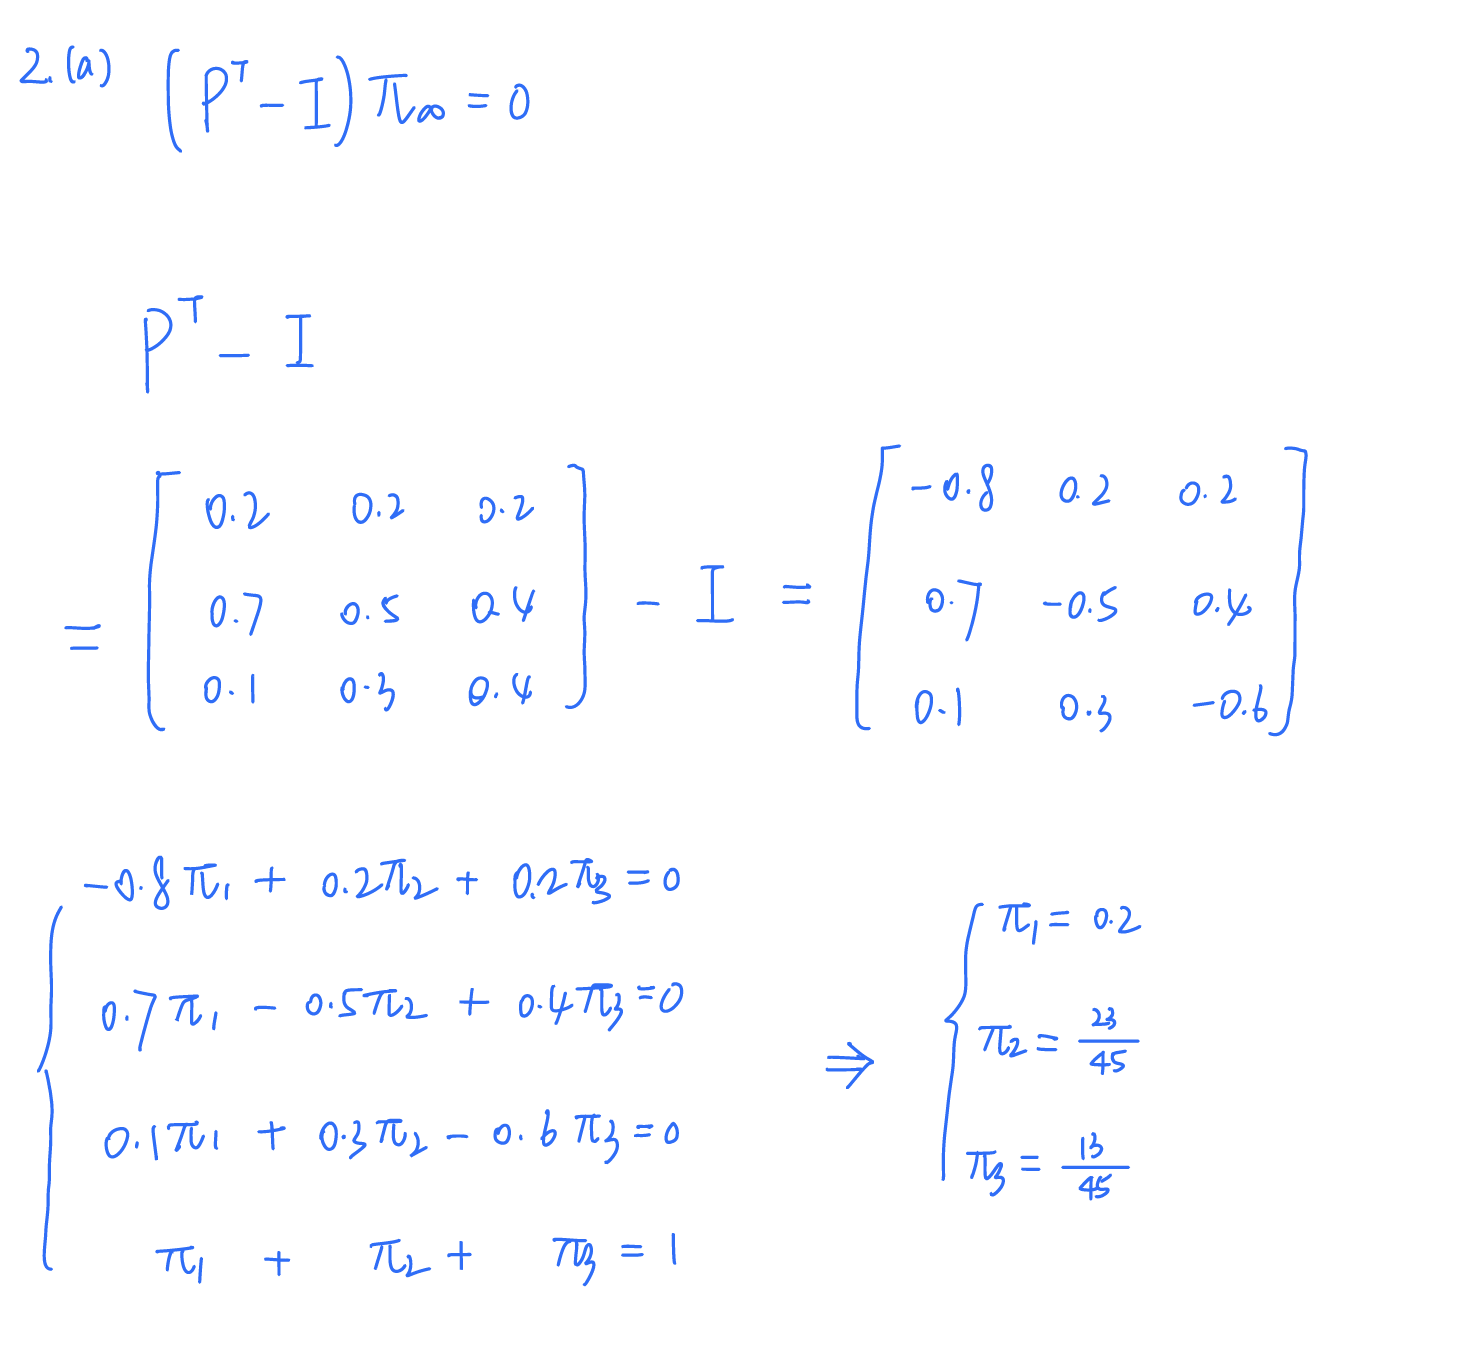

In [4]:
Image(filename="lab11202a.png")

## 2b

In [5]:
# Calculate the stationary distribution
eigenvalues, eigenvectors = eig(P.T)
index = np.argmin(np.abs(eigenvalues - 1))
stationary_distribution = np.real(eigenvectors[:, index]).astype(float)
stationary_distribution /= np.sum(stationary_distribution)
stationary_distribution

array([0.2       , 0.51111111, 0.28888889])

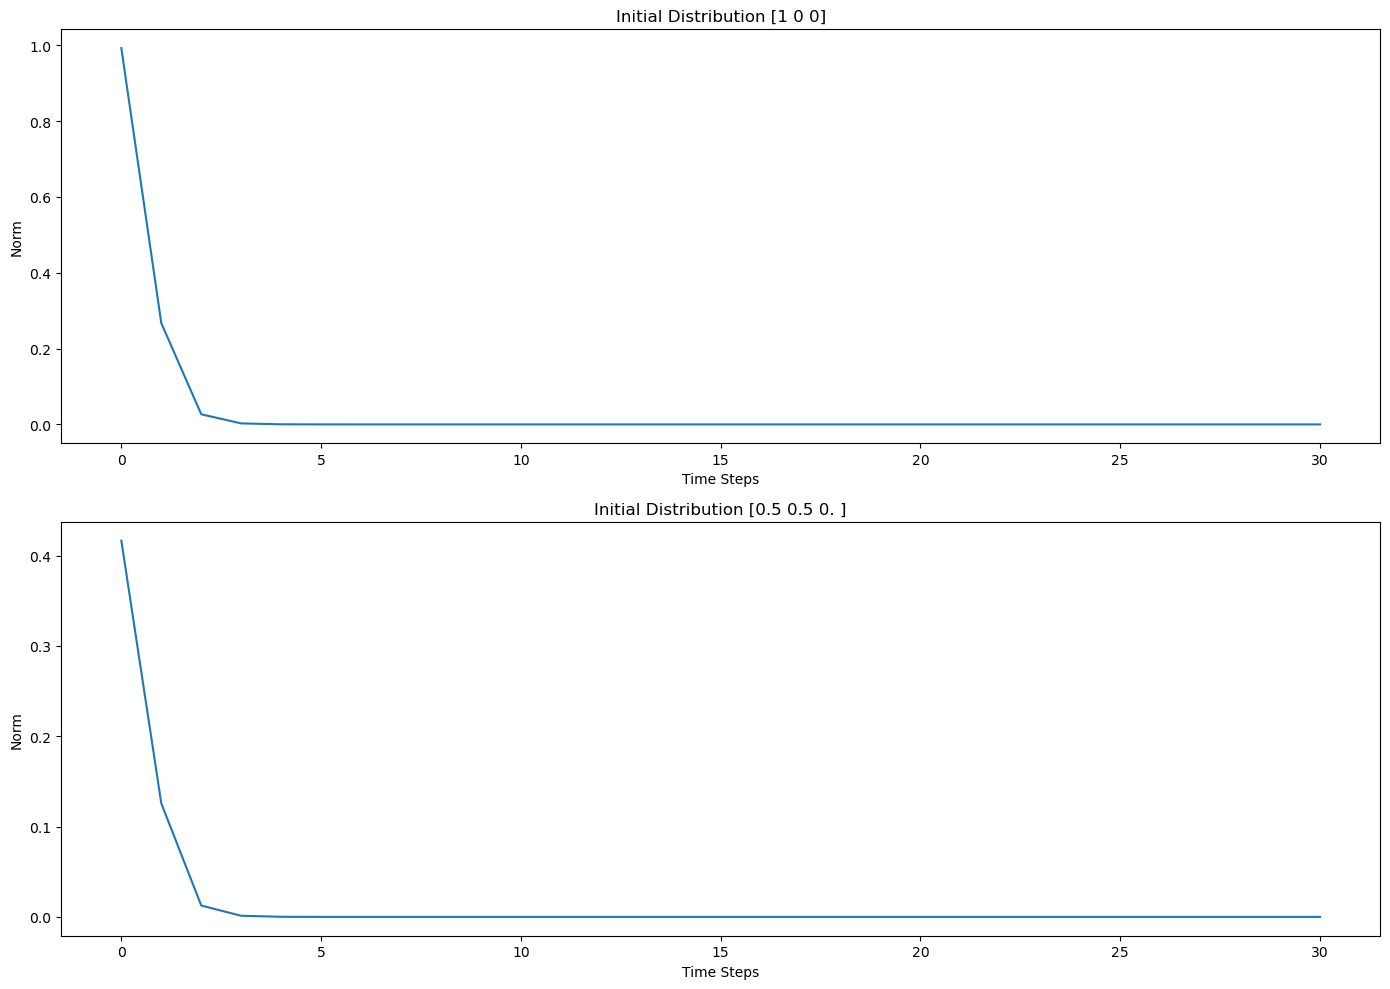

In [6]:
# Function to iterate the Markov process
def iterate_markov_process(P, initial_distribution, steps):
    distribution = initial_distribution
    distributions = [distribution]
    
    for _ in range(steps):
        distribution = np.dot(distribution, P)
        distributions.append(distribution)
    
    return np.array(distributions)

# Initial distributions
initial_distributions = [
    np.array([1, 0, 0]),  # distribution 1
    np.array([0.5, 0.5, 0]) # distribution 2
]

# Simulate the process for each initial distribution
num_steps = 30
distributions_over_time = [iterate_markov_process(P, dist, num_steps) for dist in initial_distributions]
norms_over_time = []
for distribution in distributions_over_time:
    norm = np.array([np.linalg.norm(x-stationary_distribution,2) for x in distribution])
    norms_over_time.append(norm)

# Plot the convergence for each initial distribution
time = np.arange(num_steps + 1)
fig, axs = plt.subplots(len(initial_distributions), 1, figsize=(14, 10))
for i, norm in enumerate(norms_over_time):    
    axs[i].plot(time, norm)
    axs[i].set_title(f'Initial Distribution {initial_distributions[i]}')
    axs[i].set_xlabel('Time Steps')
    axs[i].set_ylabel('Norm')
plt.tight_layout()
plt.show()

## 3a

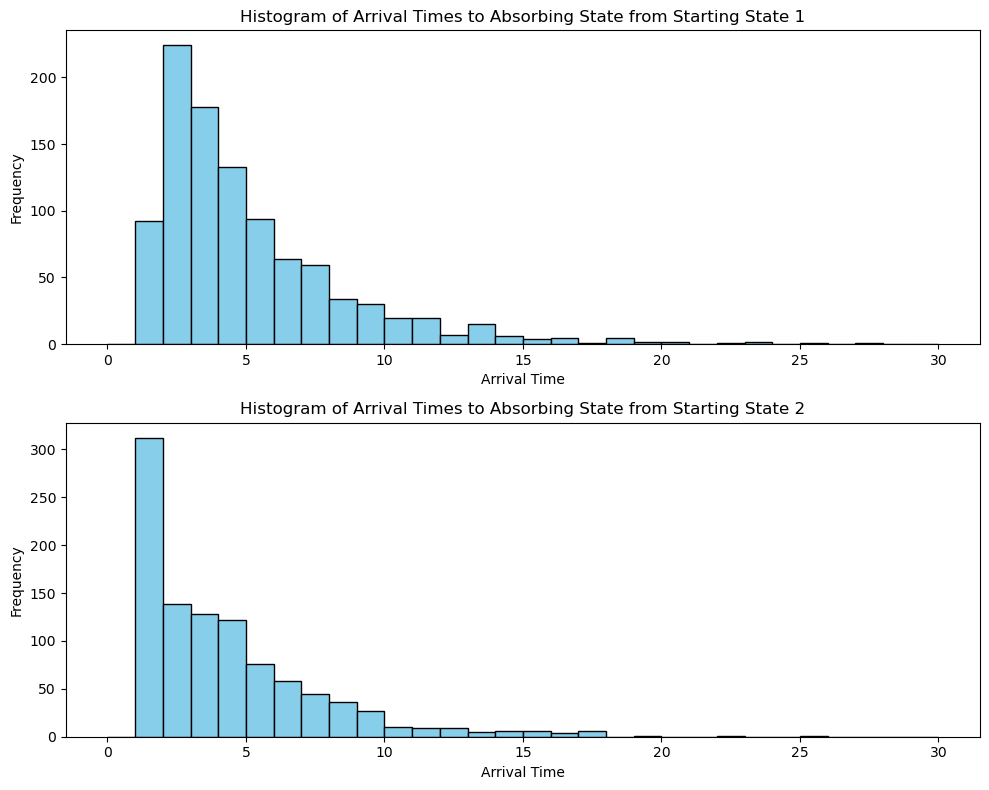

In [7]:
# Function to simulate the Markov chain until it reaches the absorbing state
def simulate_until_absorbed(transition_matrix, start_state):
    current_state = start_state
    steps_to_absorb = 0
    
    while current_state != 3:  # State 3 is absorbing
        steps_to_absorb += 1
        current_state = np.random.choice([1, 2, 3], p=transition_matrix[current_state - 1])
    
    return steps_to_absorb

# Simulate the Markov chain from two initial states a large number of times
num_simulations = 1000
starting_states = [1, 2]
absorption_times = {state: [] for state in starting_states}

for start_state in starting_states:
    for _ in range(num_simulations):
        time_to_absorb = simulate_until_absorbed(P, start_state)
        absorption_times[start_state].append(time_to_absorb)

# Plot histograms of arrival times
fig, axs = plt.subplots(len(starting_states), 1, figsize=(10, 8))
for i, state in enumerate(starting_states):
    axs[i].hist(absorption_times[state], bins=np.arange(31), color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram of Arrival Times to Absorbing State from Starting State {state}')
    axs[i].set_xlabel('Arrival Time')
    axs[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [8]:
# Calculate the mean arrival time for each starting state
mean_times = {state: np.mean(times) for state, times in absorption_times.items()}
print(f"Mean absorption time starting from 1 is {mean_times[1]}")
print(f"Mean absorption time starting from 2 is {mean_times[2]}")

Mean absorption time starting from 1 is 4.643
Mean absorption time starting from 2 is 3.812


## 3b

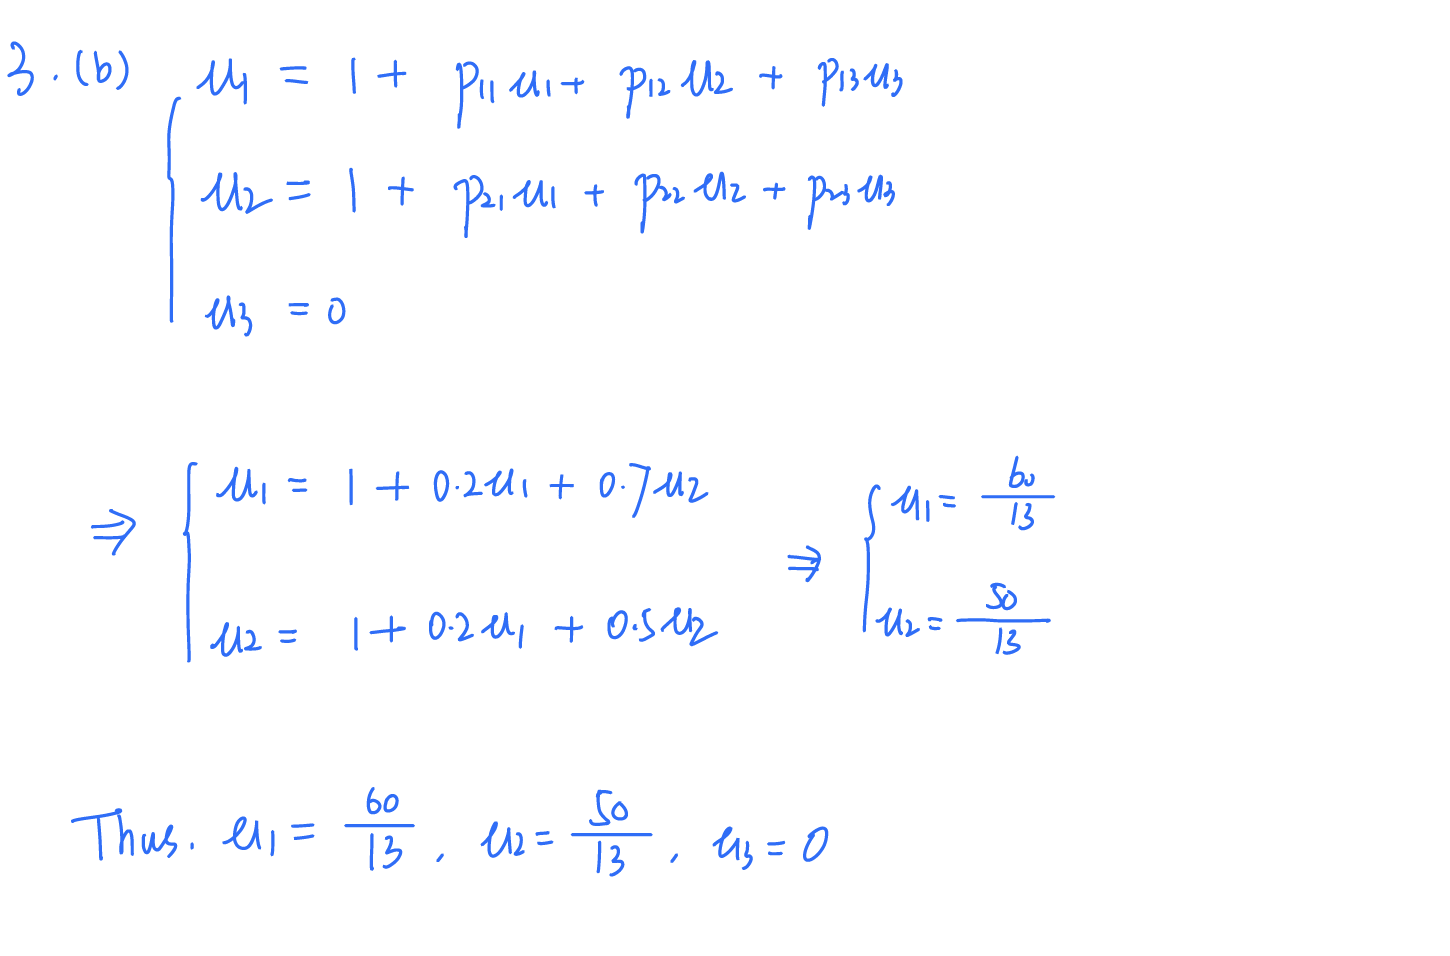

In [9]:
Image(filename="lab11203b.png")